In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [14]:
Count_Ge = data['Gender'].value_counts()
Count_Oc = data['Occupation'].value_counts()
Count_Bm = data['BMI Category'].value_counts()
Count_Sl = data['Sleep Disorder'].value_counts()
print(Count_Ge,'\n')
print(Count_Oc,'\n')
print(Count_Bm,'\n')
print(Count_Sl,'\n')

Male      189
Female    185
Name: Gender, dtype: int64 

Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    32
others         11
Name: Occupation, dtype: int64 

Normal        216
Overweight    148
Obese          10
Name: BMI Category, dtype: int64 

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64 



Clean Data

In [5]:
#แยกตัวเลขความดัน Systolic และ Diastolic
data["Systolic"] = 0
data["Diastolic"] = 0

for i, val in enumerate(data["Blood Pressure"]):
    j = 0
    
    while val[j] != "/":
        j += 1
        continue
        
    data.loc[i, "Systolic"] = int(val[:j])
    data.loc[i, "Diastolic"] = int(val[(j+1):])

data.drop("Blood Pressure", axis=1)

# เปลี่ยน Normal weight เป็น Normal
data.loc[data["BMI Category"] == "Normal Weight", "BMI Category"] = "Normal"

print("Successfully changed all the 'Normal Weight' to 'Normal'")
print("Successfully separate SYS and DIA")

# จัดกลุ่มข้อมูล outlier เป็น other
cut_off = 10
new_label = "others"

# Get the value counts
count_data = data['Occupation'].value_counts()
to_replace = count_data[count_data < cut_off].index

# Replace the labels
data['Occupation'] = data['Occupation'].replace(to_replace, new_label)

print(f"Successfully changed all occupation below {cut_off} to {new_label}")

Successfully changed all the 'Normal Weight' to 'Normal'
Successfully separate SYS and DIA
Successfully changed all occupation below 10 to others


In [4]:
display(data)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,others,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,4,Male,28,others,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,others,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,140,95


Categorical Analysis

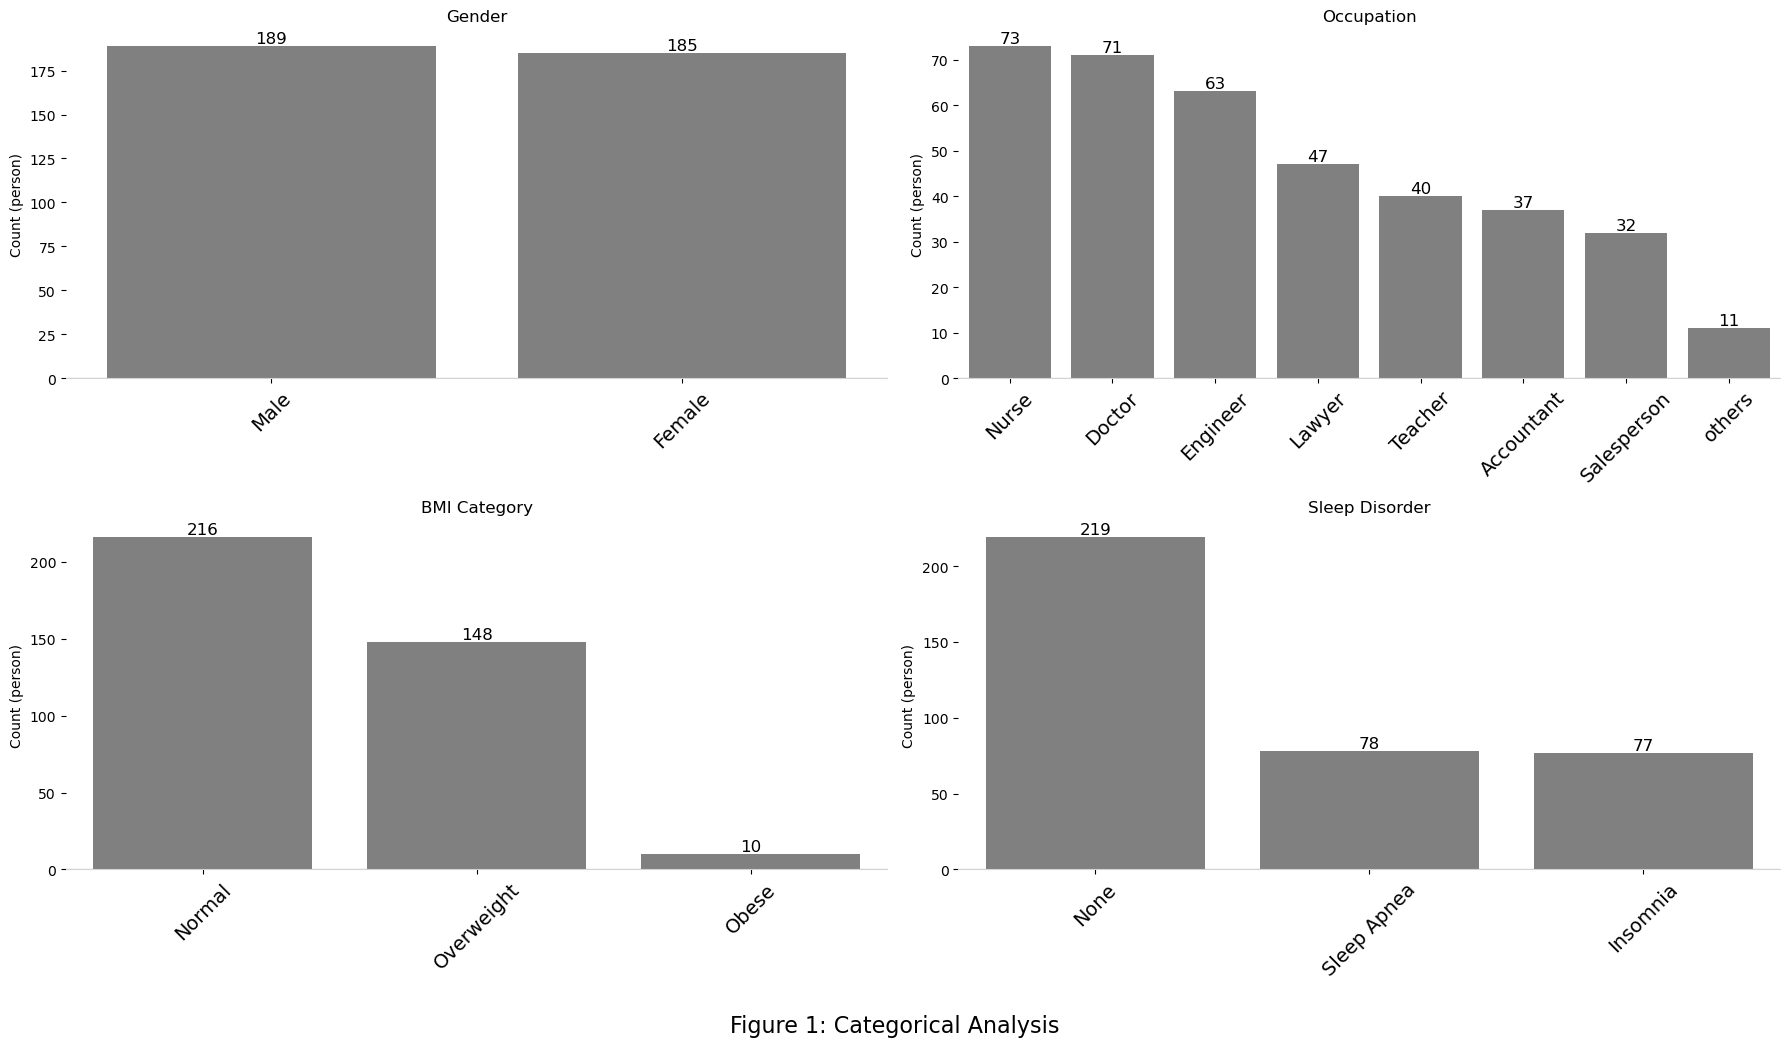

In [13]:
categorical = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

fig, axs = plt.subplots(2, 2, figsize=(18, 10))
plt.subplots_adjust(wspace=0.25, hspace=1)

for i, cat in enumerate(categorical):
    cat_counts = data[cat].value_counts().sort_values(ascending=False)
    sns.countplot(x=cat, data=data, order=cat_counts.index, color='#808080', ax=axs[int(i/2), i%2])
    axs[int(i/2), i%2].set_ylabel("Count (person)")
    axs[int(i/2), i%2].set_xlabel("")
    axs[int(i/2), i%2].set_title(cat, fontsize=12)
    axs[int(i/2), i%2].set_xticklabels(axs[int(i/2), i%2].get_xticklabels(), rotation=45, ha='center', fontsize=14)  # Increase fontsize here
    axs[int(i/2), i%2].spines['top'].set_visible(False)
    axs[int(i/2), i%2].spines['right'].set_visible(False)
    axs[int(i/2), i%2].spines['left'].set_visible(False)
    axs[int(i/2), i%2].spines['bottom'].set_color('lightgray')
    axs[int(i/2), i%2].axhline(0, color='gray', linewidth=0.8)
    for p in axs[int(i/2), i%2].patches:
        height = p.get_height()
        axs[int(i/2), i%2].text(p.get_x() + p.get_width() / 2., height, f'{height}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.suptitle('Figure 1: Categorical Analysis', fontsize=16, y= -0.02)
plt.show()


Numerical Analysis

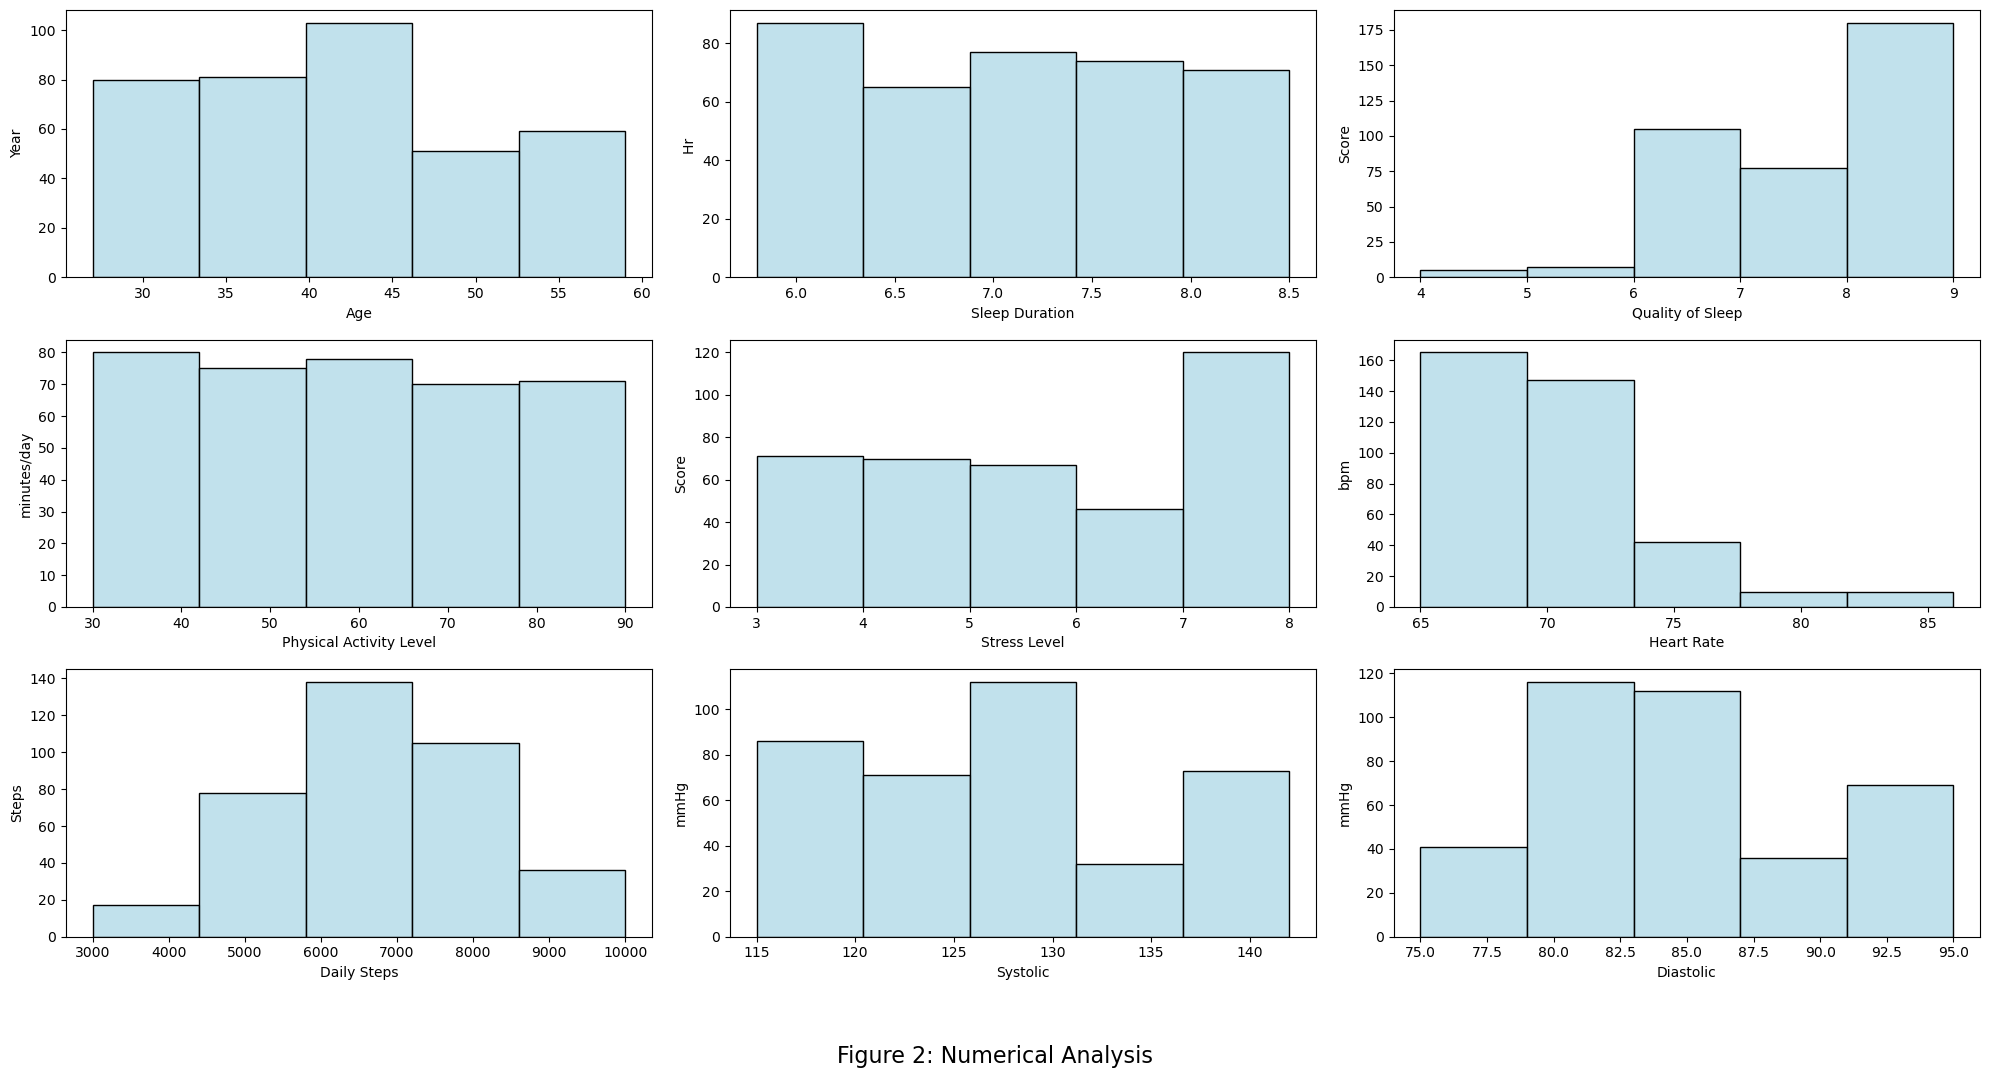

In [26]:
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
plt.subplots_adjust(wspace=0.8, hspace=0.8)

numeric = ["Age", "Sleep Duration", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "Systolic", "Diastolic"]
unit_2 = ["Year", "Hr ", "Score", "minutes/day", "Score", "bpm", "Steps", "mmHg", "mmHg"]

for i, cat in enumerate(numeric):
    sns.histplot(data[cat], bins=5, color='#ADD8E6', ax=axs[int(i/3), i%3]).set_ylabel(f"{unit_2[i]}")
    
plt.tight_layout()
plt.suptitle('Figure 2: Numerical Analysis', fontsize=16, y= -0.05)
plt.show()

Analysis of Categorical values

Correlation matrix

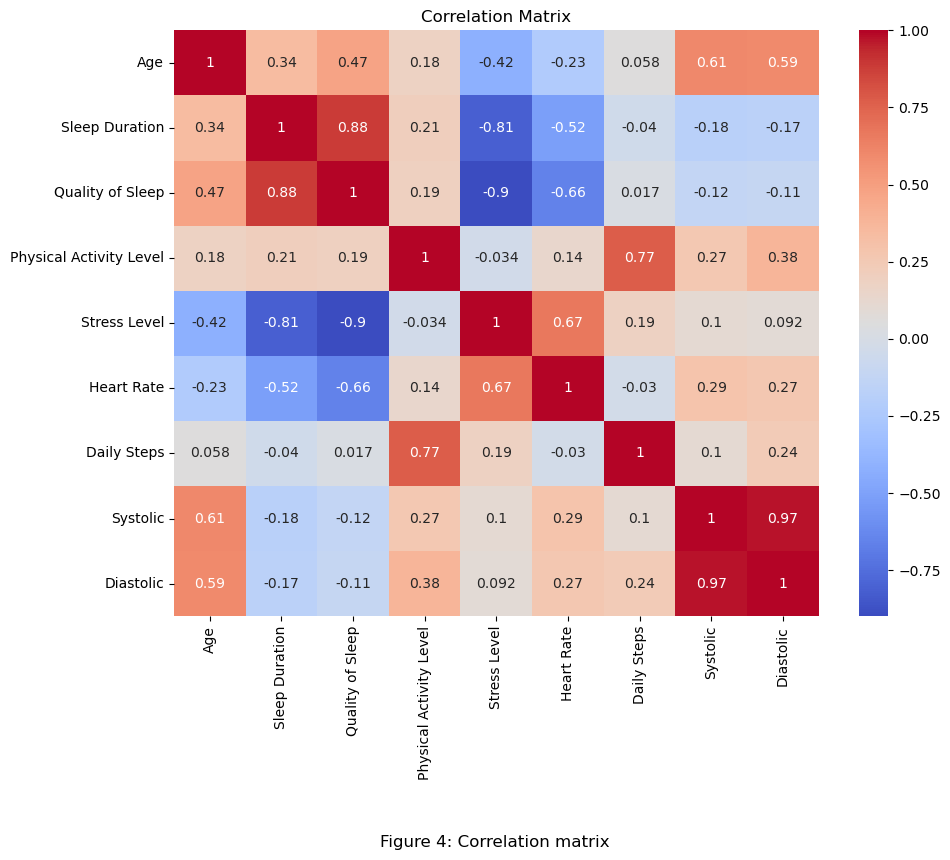

In [33]:
# ลบ Person ID ออก
numeric_columns = data.drop('Person ID', axis=1).select_dtypes(include=[np.number])

#สร้าง Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.suptitle('Figure 3: Correlation matrix', fontsize=12, y= -0.05)
plt.show()


Sleep Duration


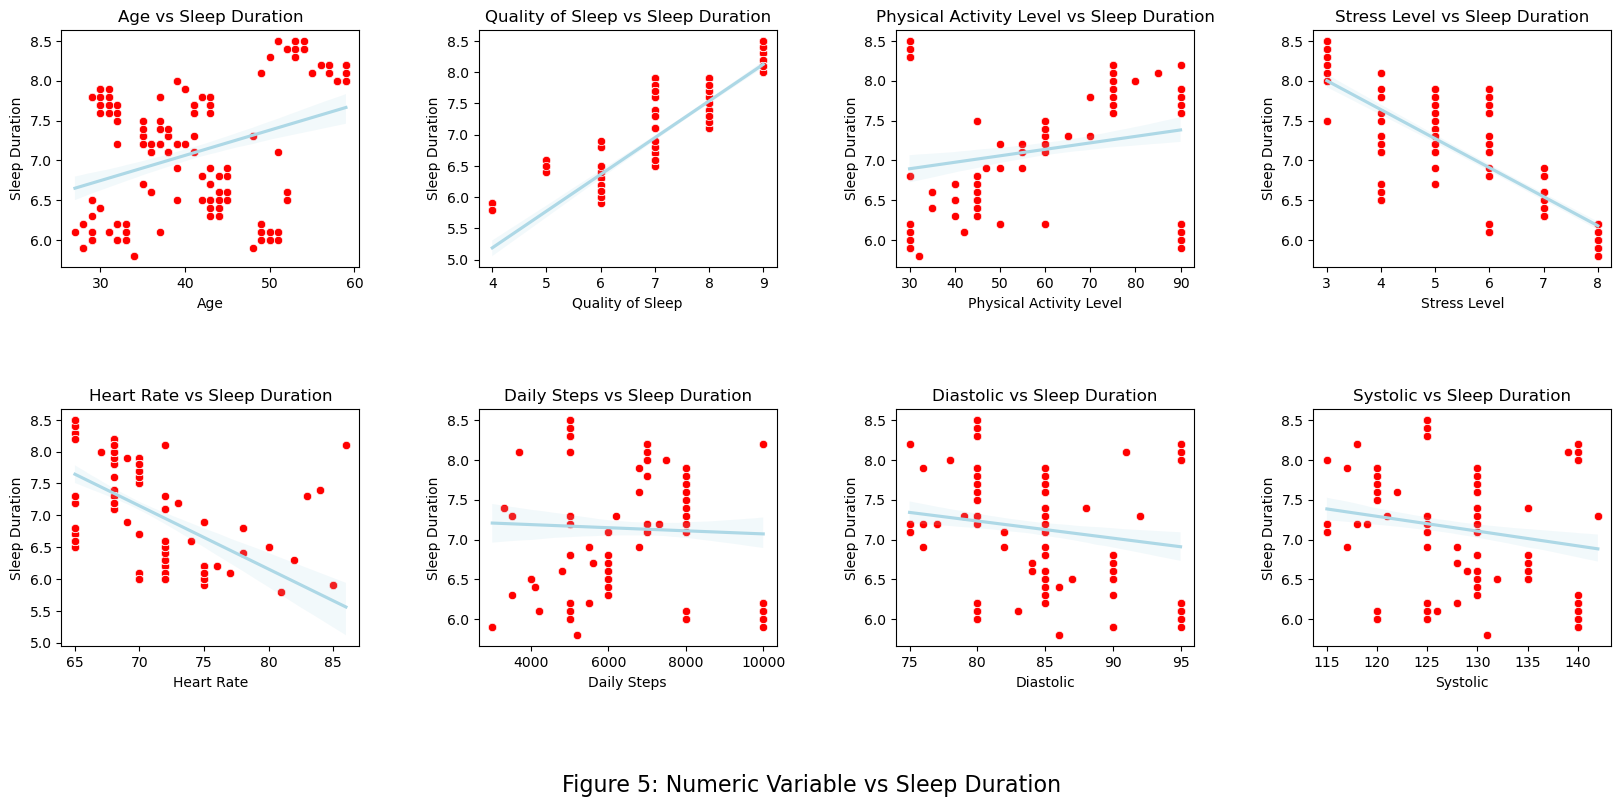

In [40]:
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

numeric_x = ["Age", "Quality of Sleep", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps", "Diastolic", "Systolic"]

for i, cat in enumerate(numeric_x):
    ax = axs[int(i/4), i%4]
    sns.scatterplot(x=cat, y="Sleep Duration", data=data, color='#FF0000', ax=ax)
    ax.set_title(f"{cat} vs Sleep Duration")
    # Add trend line
    sns.regplot(x=cat, y="Sleep Duration", data=data, scatter=False, color='#ADD8E6', ax=ax)

plt.suptitle("Figure 5: Numeric Variable vs Sleep Duration", fontsize=16, y = -0.05)
plt.show()


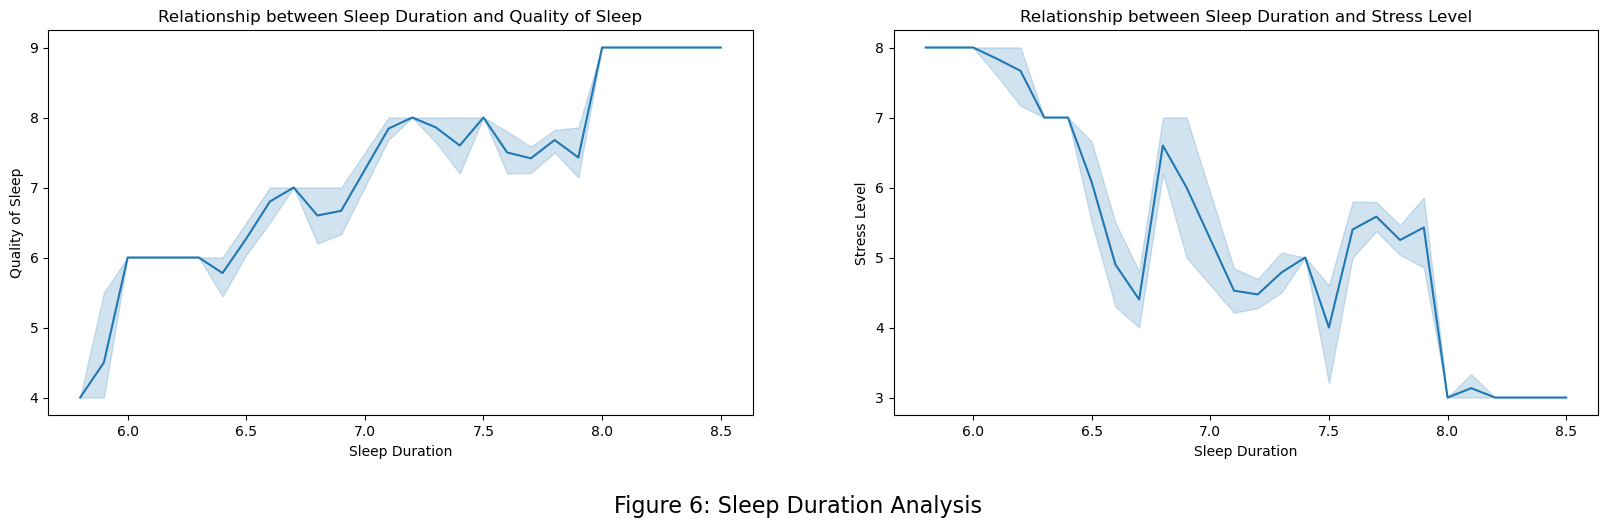

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

sns.lineplot(ax=axes[0], x='Sleep Duration', y='Quality of Sleep', data=data)
sns.lineplot(ax=axes[1], x='Sleep Duration', y='Stress Level', data=data)

axes[0].set_title('Relationship between Sleep Duration and Quality of Sleep')
axes[1].set_title('Relationship between Sleep Duration and Stress Level')

plt.suptitle('Figure 6: Sleep Duration Analysis', fontsize=16,y = -0.05)

plt.show()

Sleep Disorder 

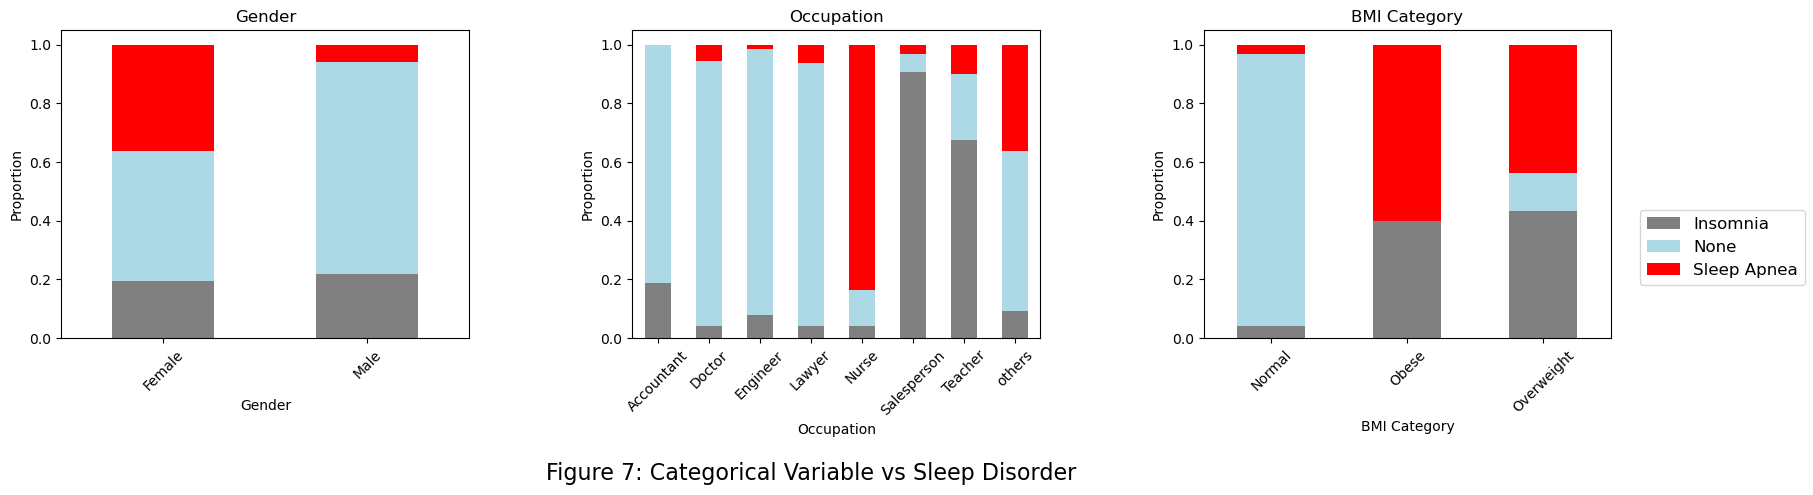

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

categorical_x = ["Gender", "Occupation", "BMI Category"]
colors = ['#808080', '#ADD8E6', '#FF0000']

for i, cat in enumerate(categorical_x):
    counts = data.groupby([cat])['Sleep Disorder'].value_counts(normalize=True).unstack()
    ax = axs[i]
    counts.plot(kind='bar', stacked=True, ax=ax, color=colors, legend=False)
    ax.set_title(cat)
    ax.set_xlabel(cat)
    ax.set_ylabel('Proportion')
    plt.setp(ax.get_xticklabels(), rotation=45)

# Add a legend
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles[:3], labels[:3], loc='center right', fontsize=12)

plt.suptitle("Figure 7: Categorical Variable vs Sleep Disorder", fontsize=16, y = - 0.1)
plt.show()